# Steam store and Video game Sales Data

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

This helps J Notebook turn things into graphs.

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

This is just reading the files to use.

In [5]:
steam_data = pd.read_csv("steam-200k.csv")
print("done")

done


In [6]:
vg_sales = pd.read_csv("vgsales-12-4-2019.csv")
vg_sales = vg_sales.replace(np.NaN, 0)
print("done")

done


# Top 10 Ranked video games

In [7]:
vg_sales.head(10)["Name"]

0                            Wii Sports
1                     Super Mario Bros.
2                        Mario Kart Wii
3         PlayerUnknown's Battlegrounds
4                     Wii Sports Resort
5    Pokemon Red / Green / Blue Version
6                 New Super Mario Bros.
7                                Tetris
8             New Super Mario Bros. Wii
9                             Minecraft
Name: Name, dtype: object

# Critic Scores for the Video Game Data set

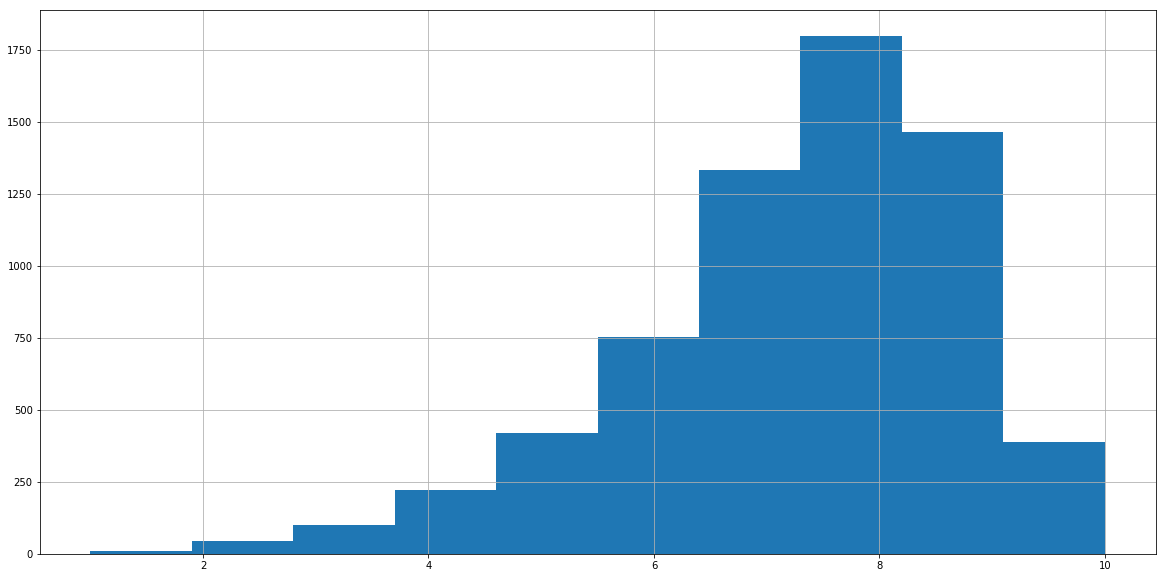

In [48]:
vg_sales["Critic_Score"][vg_sales["Critic_Score"] > 0].hist();

The critic scores of the top 10 ranked video games
shows that best sold doesn't always mean best game

Average critic score for the video games to help figure out what's a good score

In [9]:
vg_sales["Critic_Score"].mean()

0.8450817321479832

[Text(0, 0.5, 'Critic Score'), Text(0.5, 0, 'Game Rank')]

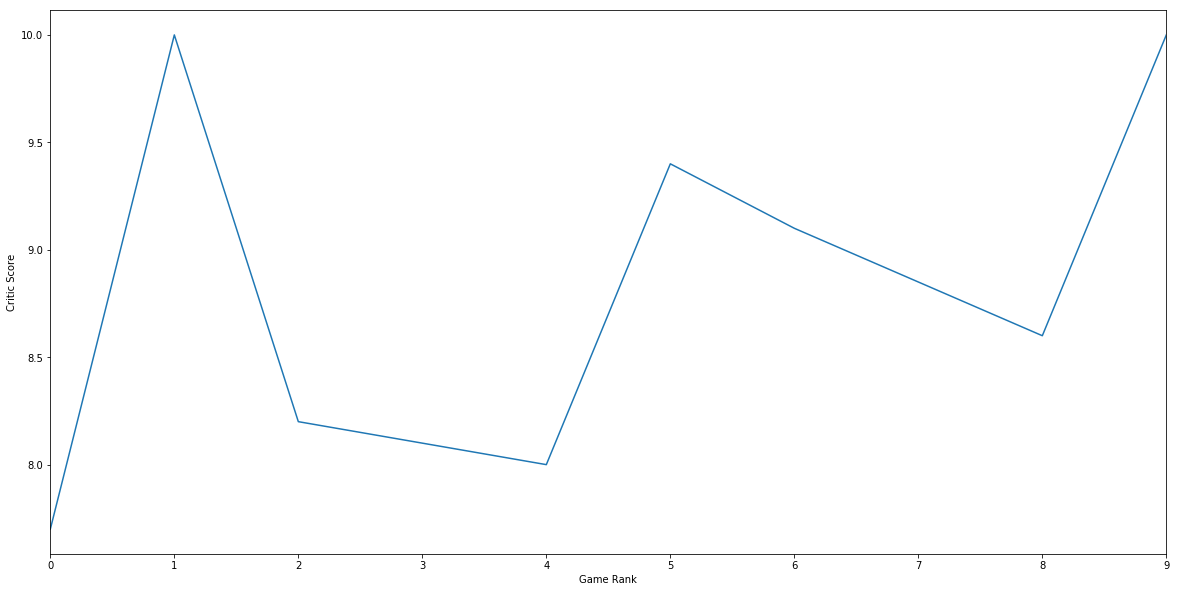

In [10]:
a = vg_sales["Critic_Score"].head(10)[vg_sales["Critic_Score"] > 0].plot(kind = "line")
a.set(xlabel="Game Rank", ylabel="Critic Score")

How many units were sold by the top 10 video games?

[Text(0, 0.5, 'Units sold (millions)'), Text(0.5, 0, 'Game Rank')]

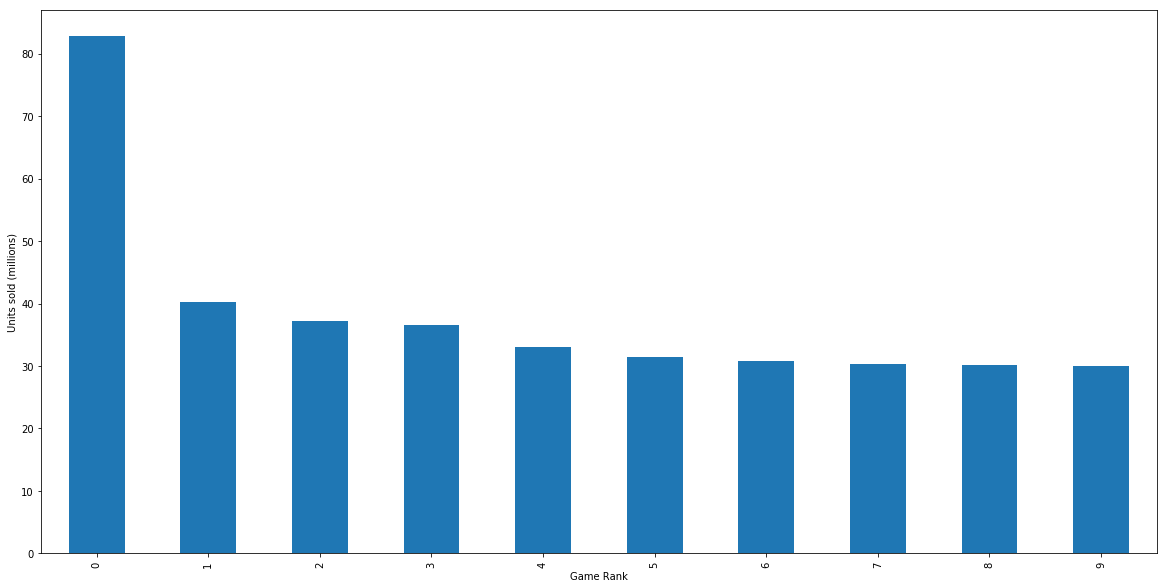

In [11]:
a = vg_sales["Total_Shipped"].head(10).plot(kind = "bar")
a.set(xlabel="Game Rank", ylabel="Units sold (millions)")

# Video games which got a Critic Score of 10

Amount of Games with score of 10 (including collectors editions):

Those Games:
You can see that many 10 games aren't even near the top via the rank number

In [12]:
vg_sales["Critic_Score"][vg_sales["Critic_Score"] > 9.9]

1        10.0
9        10.0
73       10.0
79       10.0
106      10.0
289      10.0
989      10.0
1246     10.0
1340     10.0
1509     10.0
1991     10.0
2133     10.0
31543    10.0
42730    10.0
48215    10.0
48498    10.0
53703    10.0
Name: Critic_Score, dtype: float64

It goes from 17 indexes to 15 results because there was duplicates data for collectors editions
That data was redundant as it showed the same information

In [13]:
from operator import itemgetter 

full_list = vg_sales["Name"]
#17 unique index numbers from critic scores which were 10
index_of_10 = [1, 9, 73, 79, 106, 289, 989, 1246, 1340, 1509, 1991, 2133, 31543, 42730, 48215, 48498, 53703]
final = itemgetter(*index_of_10)(full_list)

from collections import OrderedDict
#Getting rid of any duplicate data, left with 15 items, meaning there was duplicate data - This is due to collectors editions
list(OrderedDict.fromkeys(final))

['Super Mario Bros.',
 'Minecraft',
 'Grand Theft Auto IV',
 'Super Mario Kart',
 'The Legend of Zelda: A Link to the Past',
 'Dragon Quest XI: Echoes of an Elusive Age',
 'Final Fantasy II',
 'The Legend of Zelda: Breath of the Wild',
 'Final Fight',
 'Red Dead Redemption: Undead Nightmare',
 'Fusion: Genesis',
 'Renegade Ops',
 'The gamrReview Test Game',
 "The Legend of Zelda Collector's Edition",
 'Forza Horizon 4']

Who are the 10 the most frequent Developers in the top 1000 video games?

[Text(0, 0.5, 'Amount of Games in top 1000'), Text(0.5, 0, 'Game Developer')]

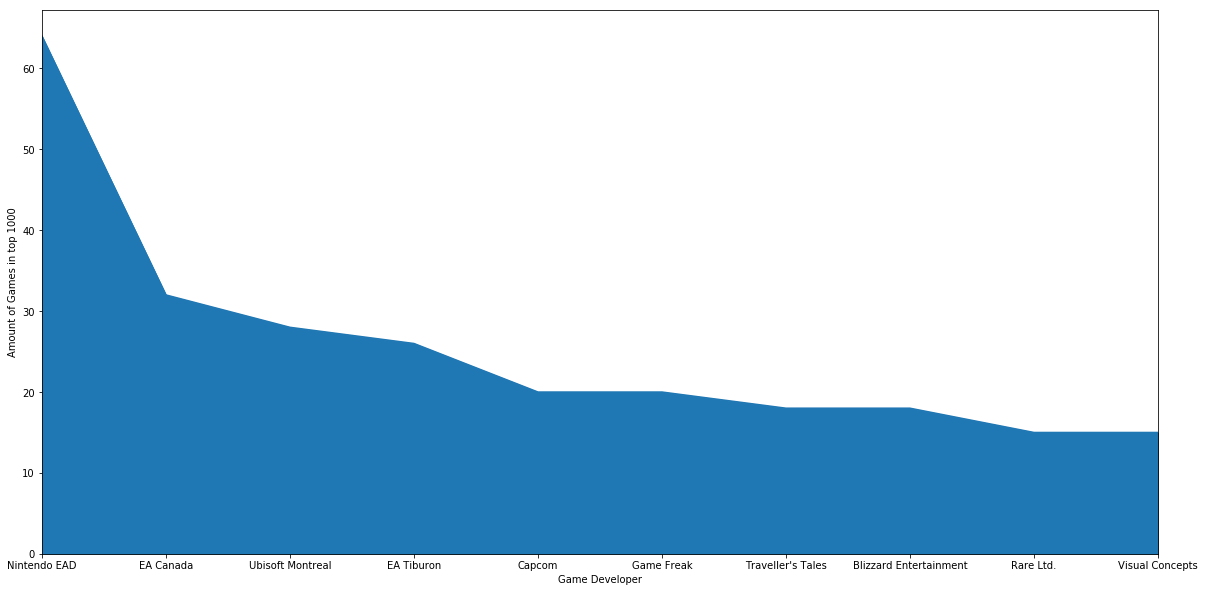

In [14]:
a = vg_sales["Developer"].head(1000).value_counts().head(10).plot(kind = "area")
a.set(xlabel="Game Developer", ylabel="Amount of Games in top 1000")

Who are the top 10 most developed for consoles in the top 1000 video games?

[Text(0, 0.5, 'Amount of Games for console in top 1000'),
 Text(0.5, 0, 'Console')]

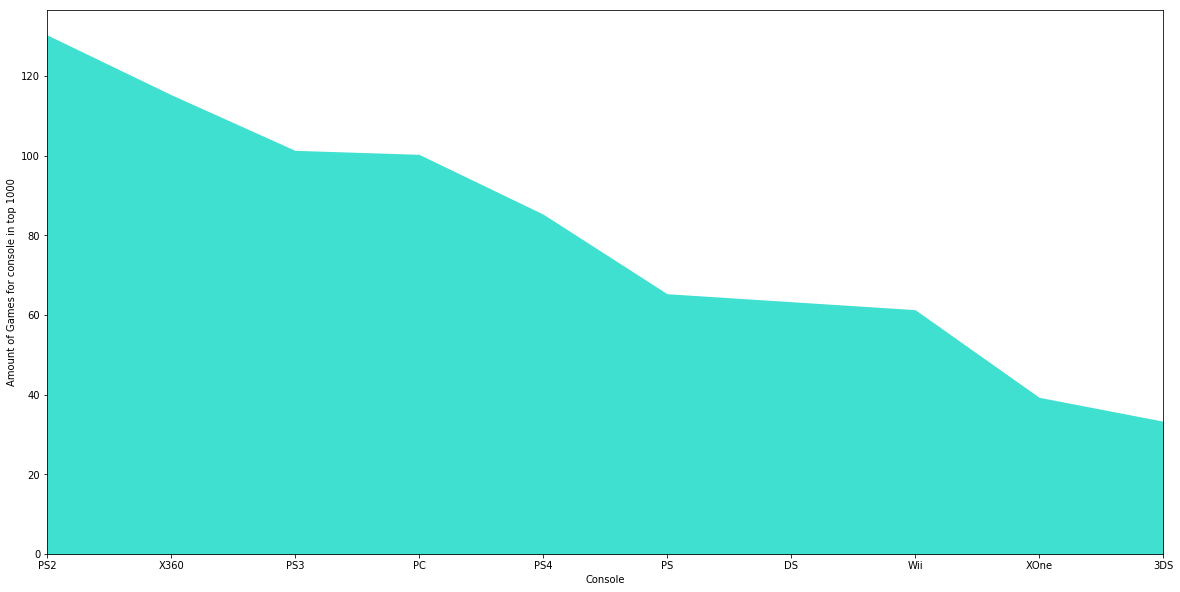

In [15]:
a = vg_sales["Platform"].head(1000).value_counts().head(10).plot(kind = "area", color = "turquoise")
a.set(xlabel="Console", ylabel="Amount of Games for console in top 1000")

Graph of top 10 Highest Ranked video games for 2019 and their shippings:

In [52]:
if vg_sales["Year"] > 2018:
    print(vg_sales[["Rank", "Name", "Developer", "Critic_Score", "Total_Shipped"]].head(10))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
vg_sales.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

The highest Playtime someone had on one of these video games for steam:

In [18]:
MaxHours = max(steam_data["Hours Played"])
print(MaxHours)

11754.0


This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

In [19]:
row_one = steam_data.iloc[1]
row_one

Steam ID                             151603712
Video Game          The Elder Scrolls V Skyrim
Played/Purchased                          play
Hours Played                               273
Name: 1, dtype: object

In [21]:
steam_data["Hours Played"]

0           1.0
1         273.0
2           1.0
3          87.0
4           1.0
5          14.9
6           1.0
7          12.1
8           1.0
9           8.9
10          1.0
11          8.5
12          1.0
13          8.1
14          1.0
15          7.5
16          1.0
17          3.3
18          1.0
19          2.8
20          1.0
21          2.5
22          1.0
23          2.0
24          1.0
25          1.4
26          1.0
27          1.3
28          1.0
29          1.3
          ...  
199970      1.0
199971     42.0
199972      1.0
199973     22.0
199974      1.0
199975     16.8
199976      1.0
199977     15.4
199978      1.0
199979     10.8
199980      1.0
199981      9.1
199982      1.0
199983      2.9
199984      1.0
199985      2.8
199986      1.0
199987      2.6
199988      1.0
199989      2.5
199990      1.0
199991      2.4
199992      1.0
199993      2.2
199994      1.0
199995      1.5
199996      1.0
199997      1.5
199998      1.0
199999      1.4
Name: Hours Played, Leng

Average Hours Played for all games

In [22]:
steam_data["Hours Played"].mean()

17.874384000000475

All of the hours Played

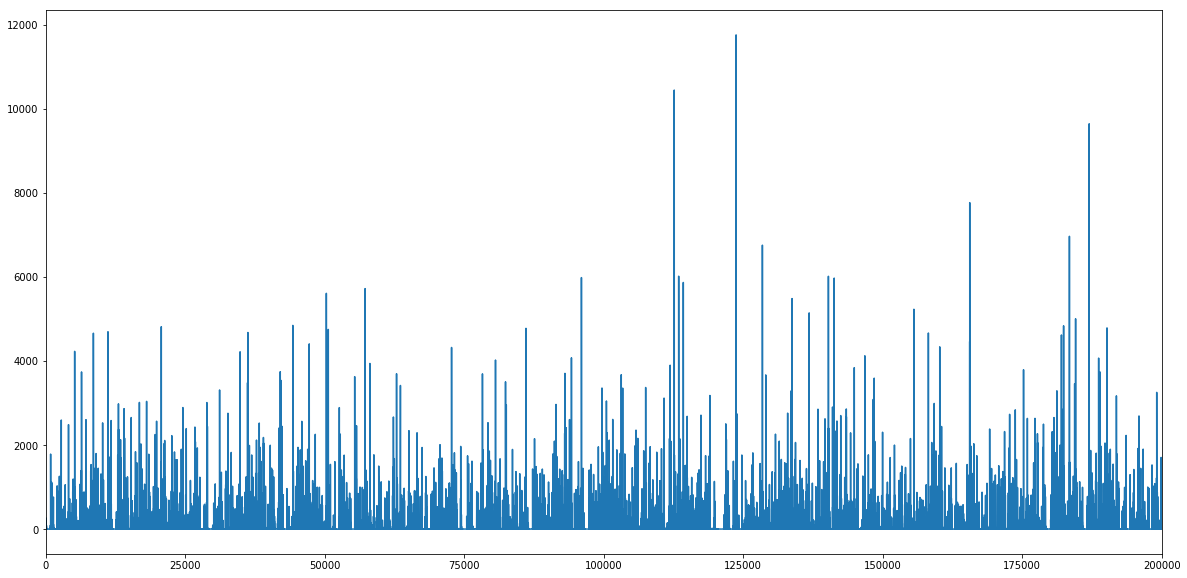

In [46]:
steam_data["Hours Played"].plot();

Purchased vs Played

We can see that more games have been purchased than played, this may be due to people buying bundles of games on steam or due to buying a game for future use.

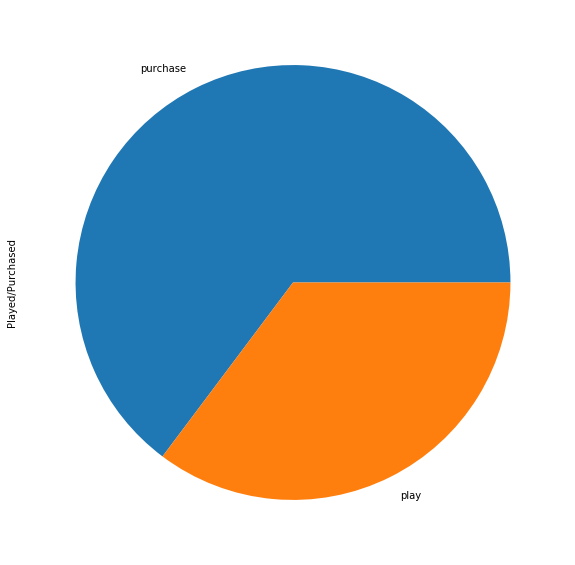

In [25]:
steam_data["Played/Purchased"].value_counts().plot(kind = "pie");

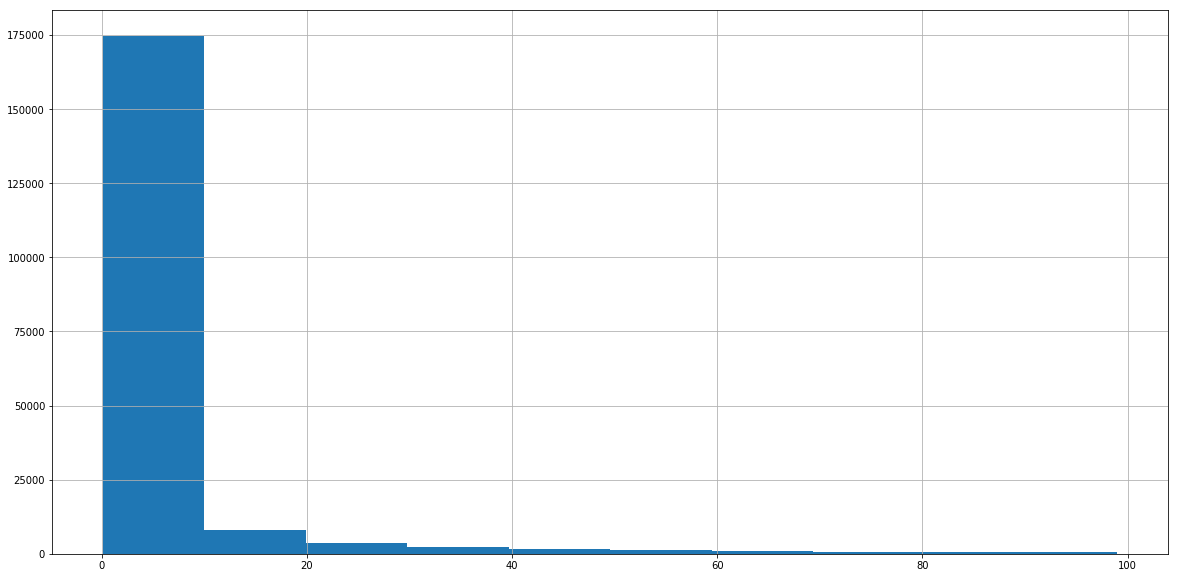

In [26]:
steam_data["Hours Played"][steam_data["Hours Played"] < 100].hist()

Top 10 Most Bought Games in Steam

In [27]:
steam_data["Video Game"].value_counts().head(10)

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
Counter-Strike Source              1693
Counter-Strike                     1424
Garry's Mod                        1397
The Elder Scrolls V Skyrim         1394
Warframe                           1271
Name: Video Game, dtype: int64

Graph displaying the difference in numbers

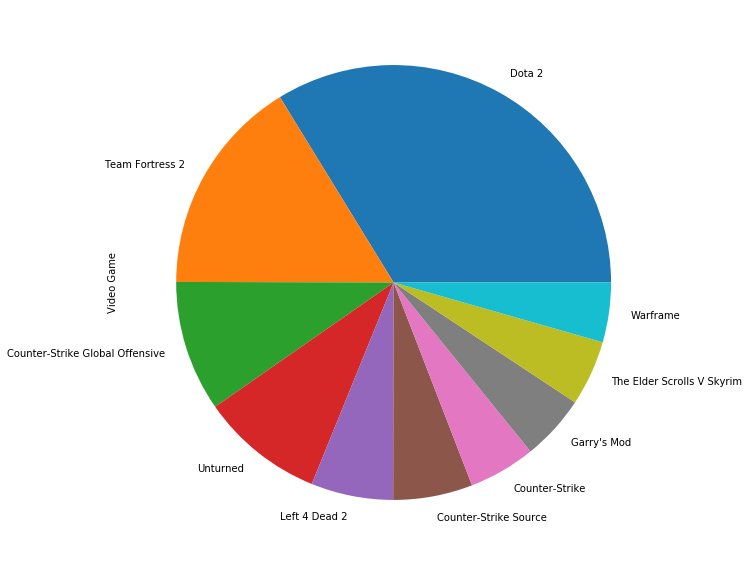

In [28]:
a = steam_data["Video Game"].value_counts().head(10).plot(kind = "pie")

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [29]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [30]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [31]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0      0
1      1
2      2
3      3
98    98
99    99
dtype: int64

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [32]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",         "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca", "guineafowl",         "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal", "turkey", "Goldfish", 
        "rabbit", "Koi", "canary", "Society finch", "Fancy mouse", "Siamese fighting fish",         "Fancy rat and Lab rat", "mink", "red fox", "hedgehog", "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = ["o" in x for x in pets_series]
print(pattern_of_bools)

pets_series[pattern_of_bools]

[True, True, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False]


0                   Dog
1                  Goat
9                Donkey
11        Water buffalo
12    Western honey bee
13      dromedary camel
14                Horse
15             silkmoth
16               pigeon
17                goose
22           guineafowl
24         muscovy duck
25         Barbary dove
29             Goldfish
31                  Koi
33        Society finch
34          Fancy mouse
38              red fox
39             hedgehog
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

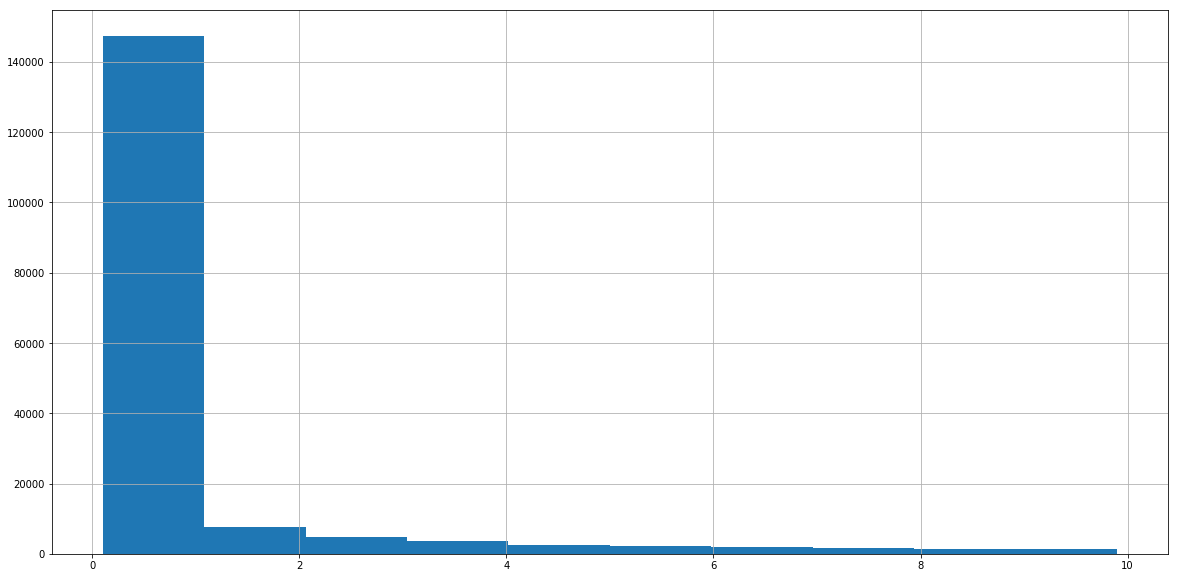

In [33]:
steam_data["Hours Played"][steam_data["Hours Played"] < 10].hist();

Let's see what's under $1000

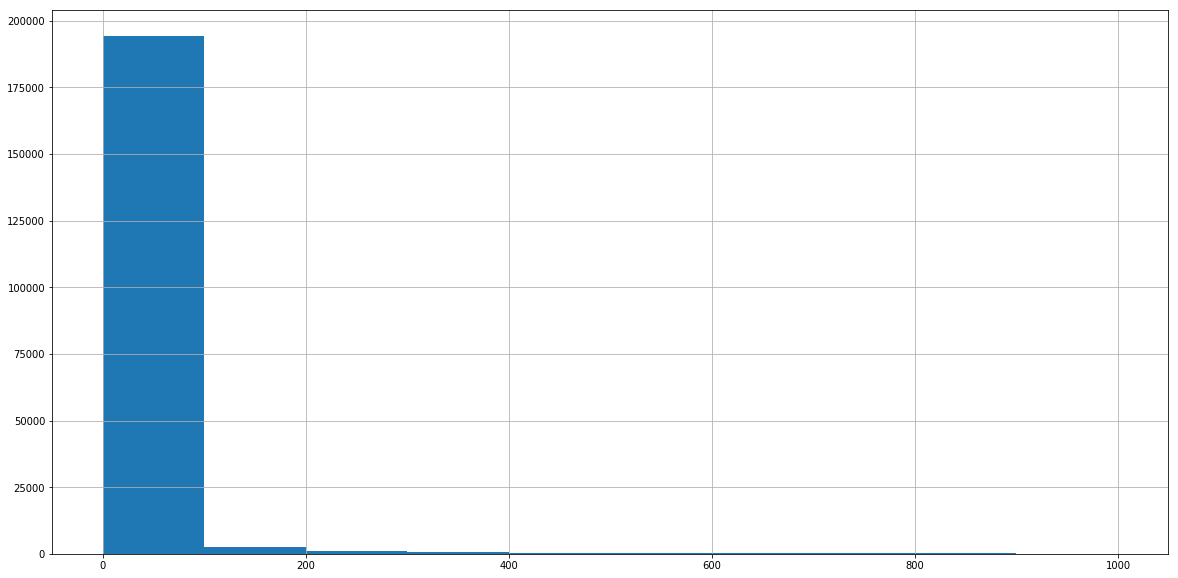

In [34]:
steam_data["Hours Played"][steam_data["Hours Played"] < 1000].hist();

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [35]:
steam_data["Hours Played"].value_counts()

1.0       130569
0.2         3016
0.3         2517
0.4         2129
0.5         1813
0.1         1787
0.6         1643
0.7         1380
0.8         1278
0.9         1229
1.1          948
1.2          943
1.3          913
1.4          829
1.5          797
1.7          696
1.6          686
1.9          647
1.8          645
2.0          601
2.2          565
2.1          553
2.3          534
2.4          490
22.0         487
2.7          474
2.8          467
3.0          466
21.0         461
2.5          460
           ...  
1677.0         1
4659.0         1
3353.0         1
1592.0         1
789.0          1
716.0          1
1675.0         1
1702.0         1
1337.0         1
1559.0         1
892.0          1
841.0          1
3374.0         1
913.0          1
2496.0         1
2852.0         1
1156.0         1
4694.0         1
1173.0         1
1170.0         1
1552.0         1
2666.0         1
3692.0         1
1198.0         1
1335.0         1
2341.0         1
3695.0         1
1545.0        

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

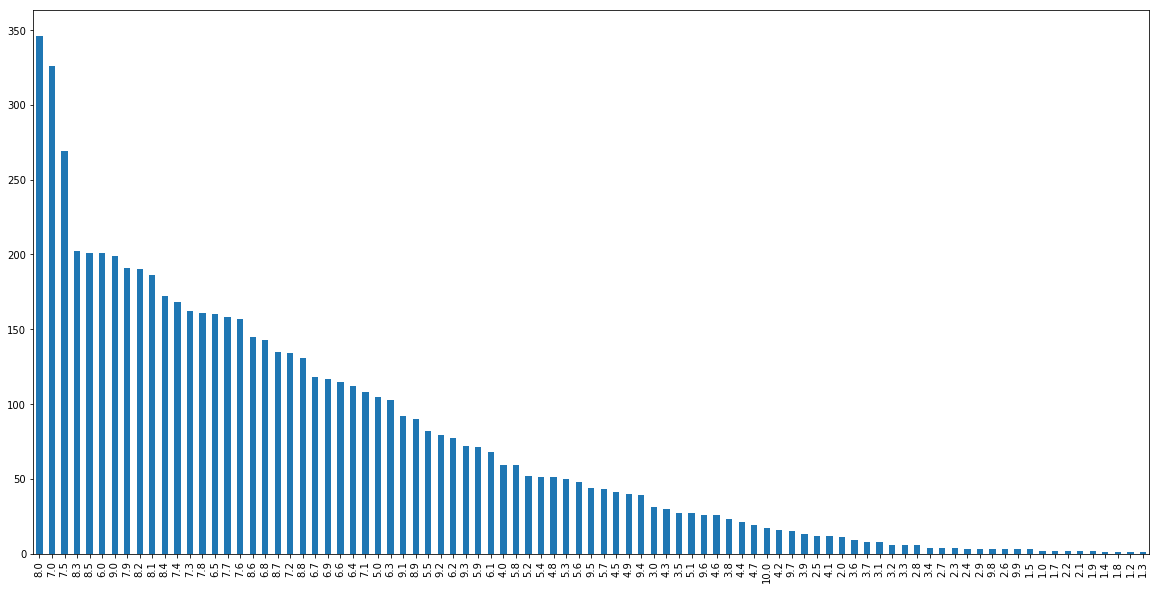

In [36]:
a = vg_sales["Critic_Score"][vg_sales["Critic_Score"] > 0]
a.value_counts().plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

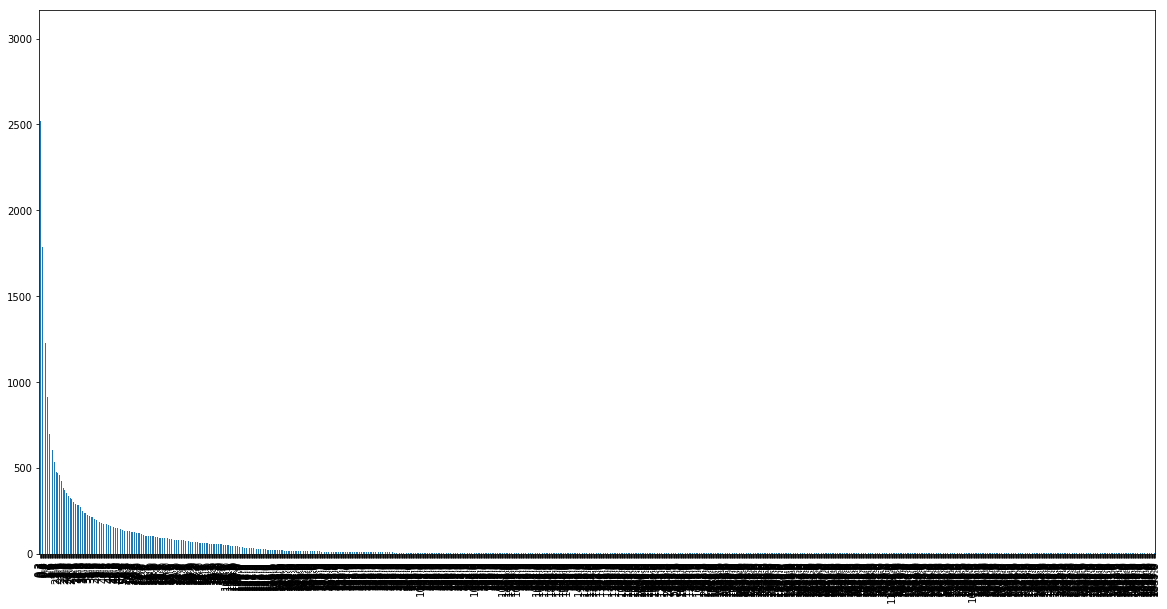

In [37]:
pdvc = steam_data["Hours Played"].value_counts()
pdvc[pdvc < 5000].plot(kind="bar")

This pattern keeps repeating itself:

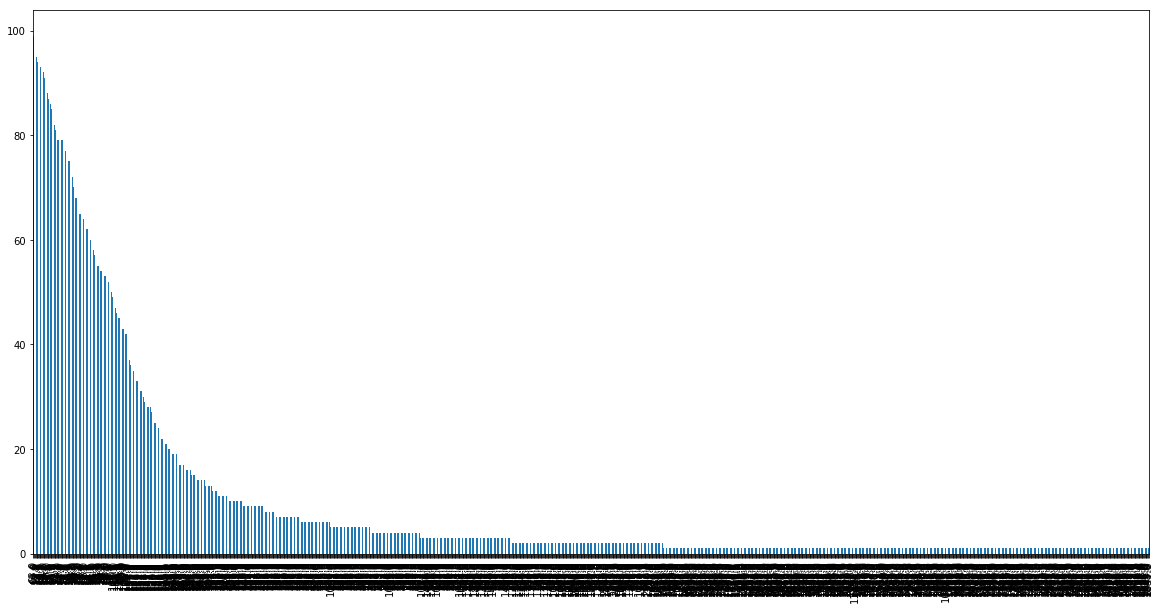

In [39]:
pdvc[pdvc < 100].plot(kind="bar")

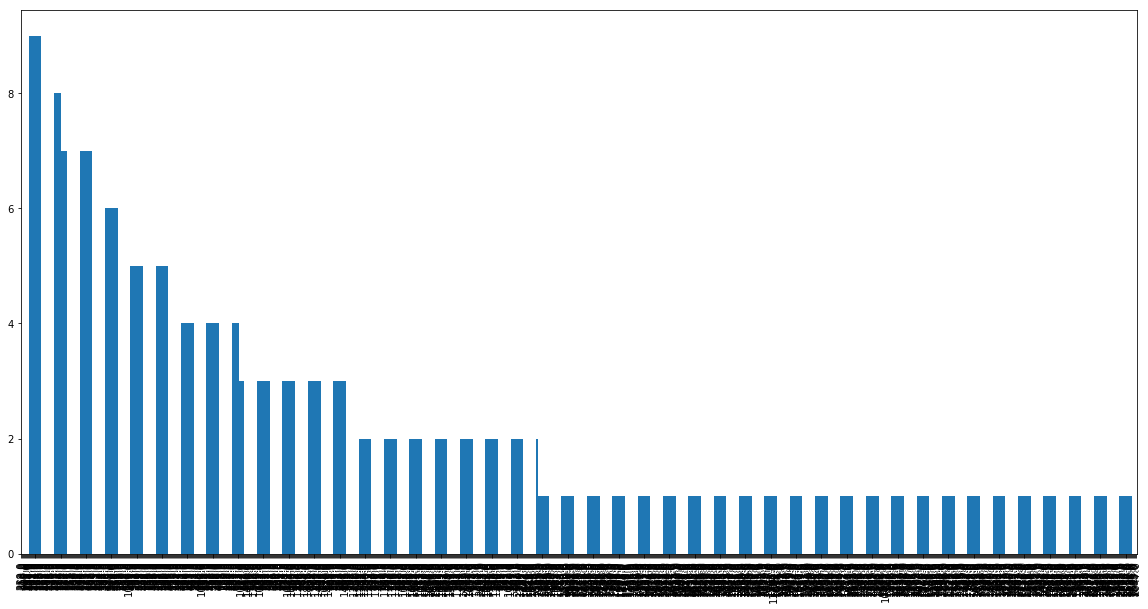

In [40]:
pdvc[pdvc < 10].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [41]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

C:\Users\ninte\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


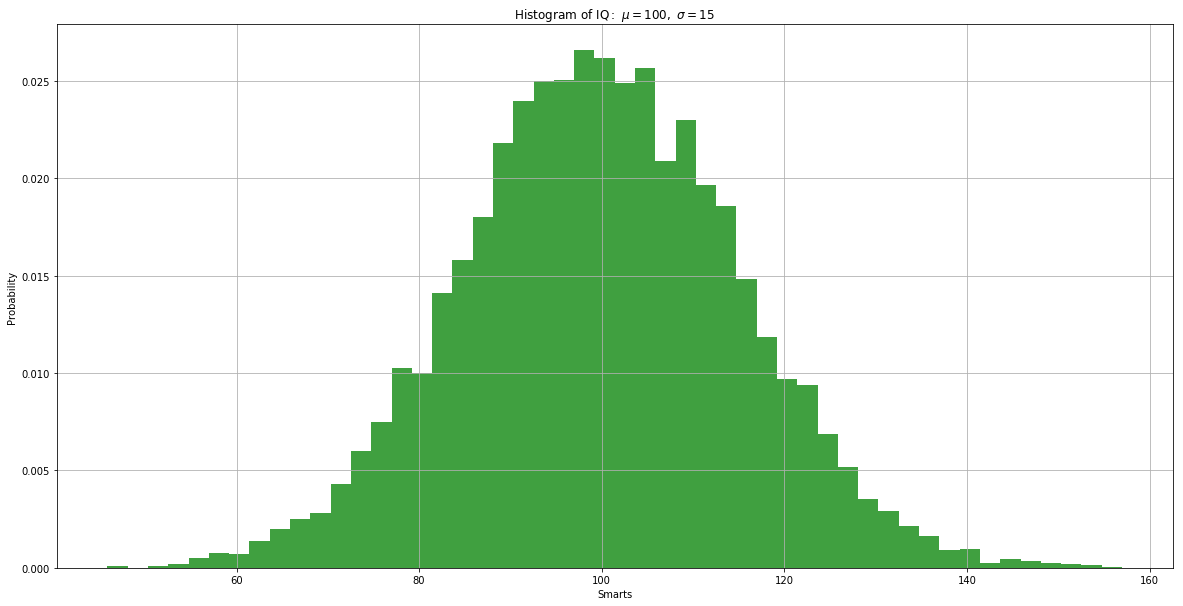

In [42]:
# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

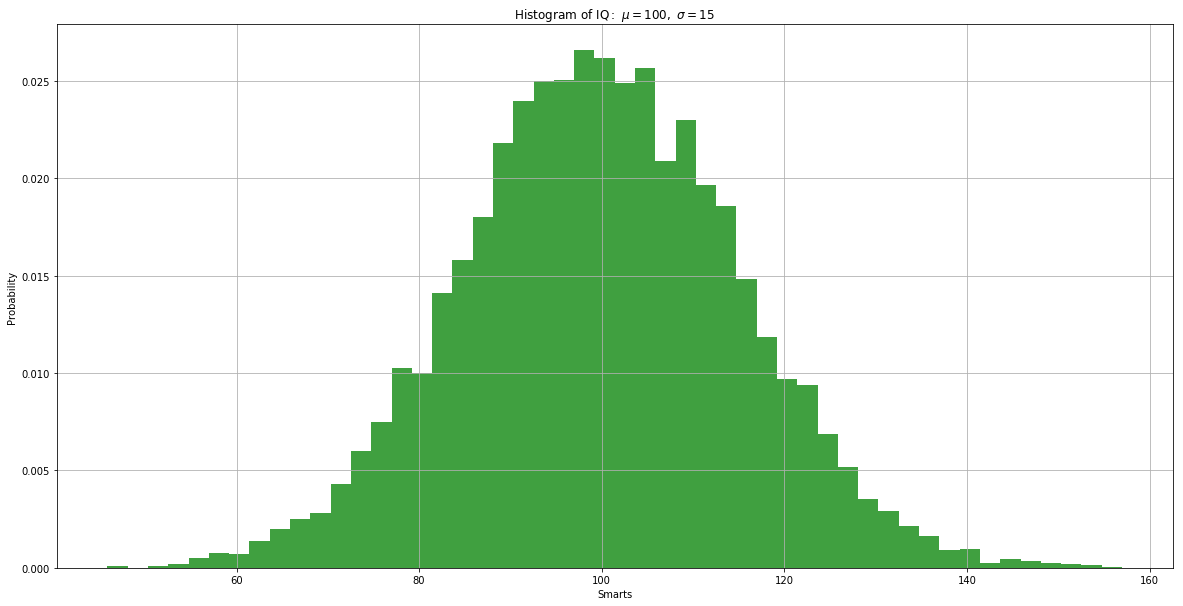

In [43]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

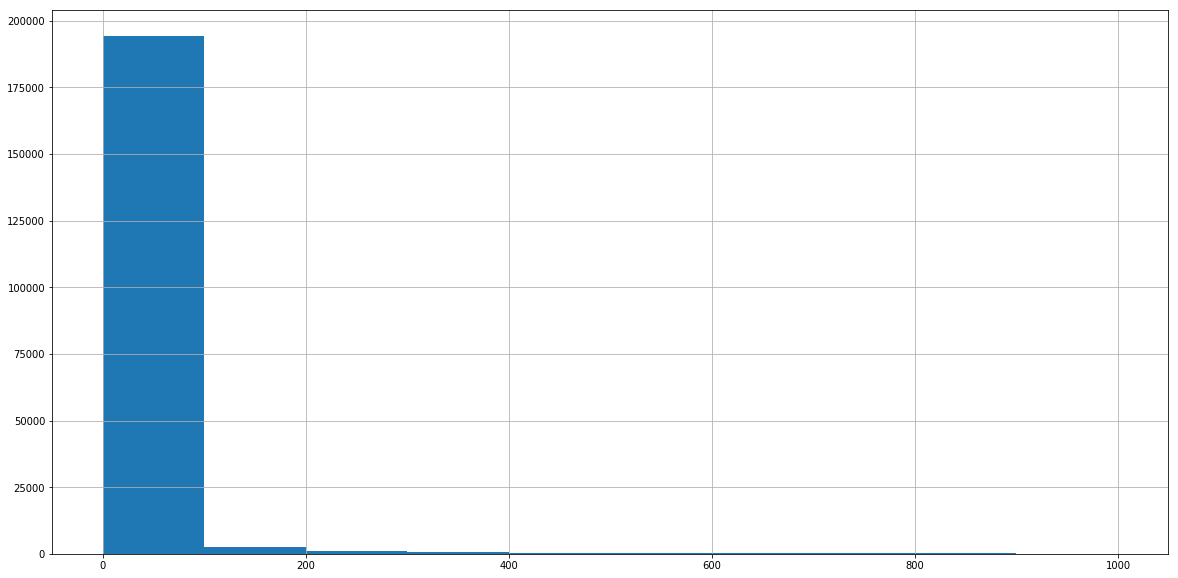

In [44]:
steam_data["Hours Played"][steam_data["Hours Played"] < 1000].hist()

And this is how we'd change it so that we can add more features:

In [45]:
capped_face_value_data = steam_data["FACE_VALUE"][steam_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

KeyError: 'FACE_VALUE'

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

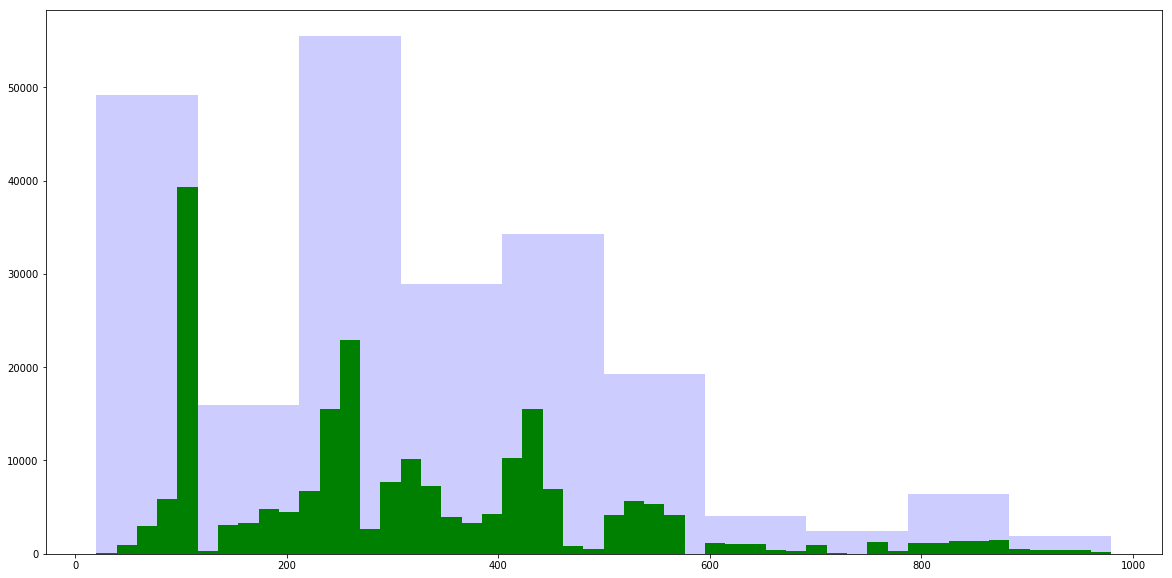

In [32]:
capped_face_value_data = steam_data["FACE_VALUE"][steam_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

We can go back to our initial, unfiltered, data:

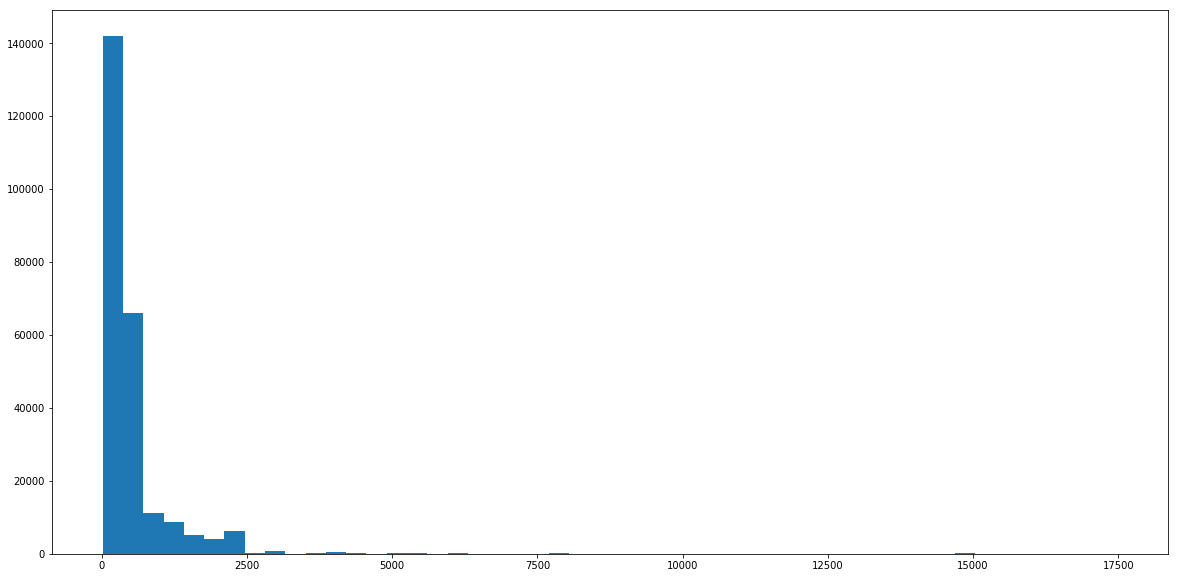

In [33]:
plt.hist(steam_data["FACE_VALUE"], bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

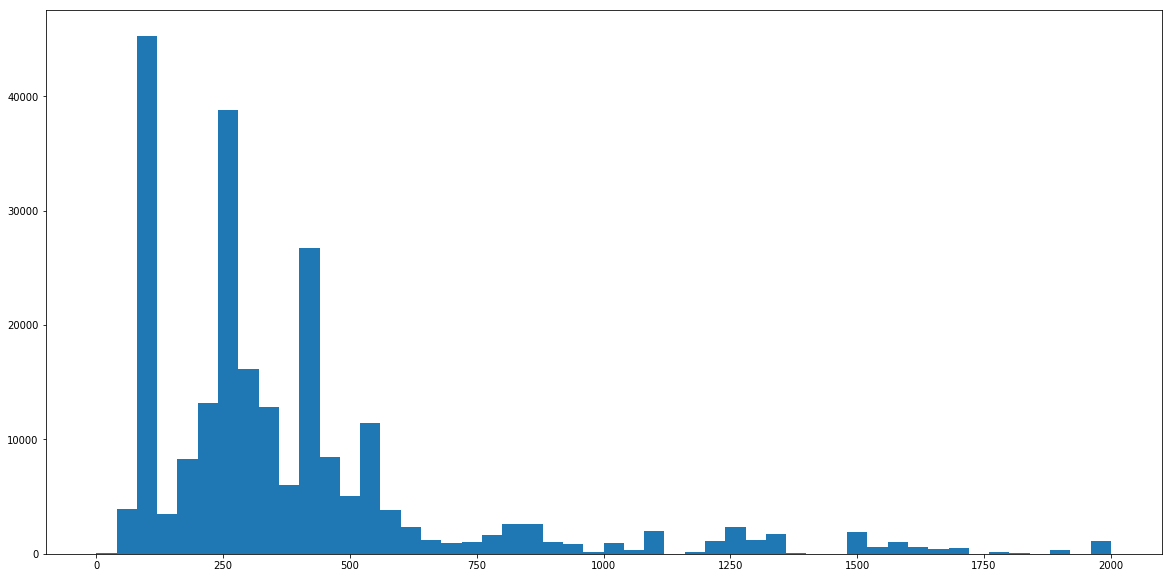

In [34]:
plt.hist(steam_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

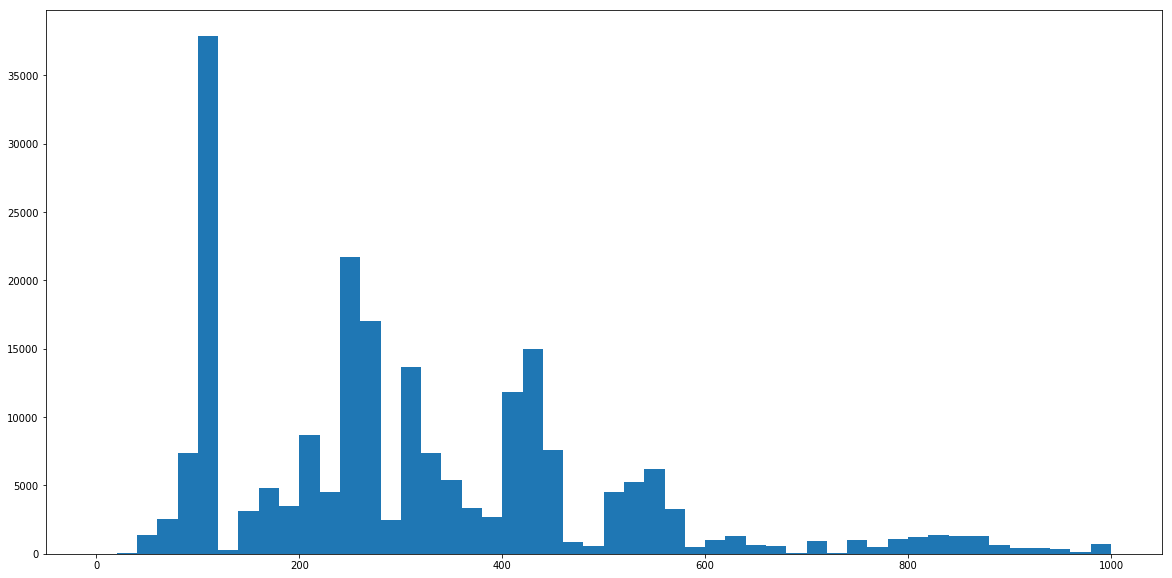

In [35]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(steam_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

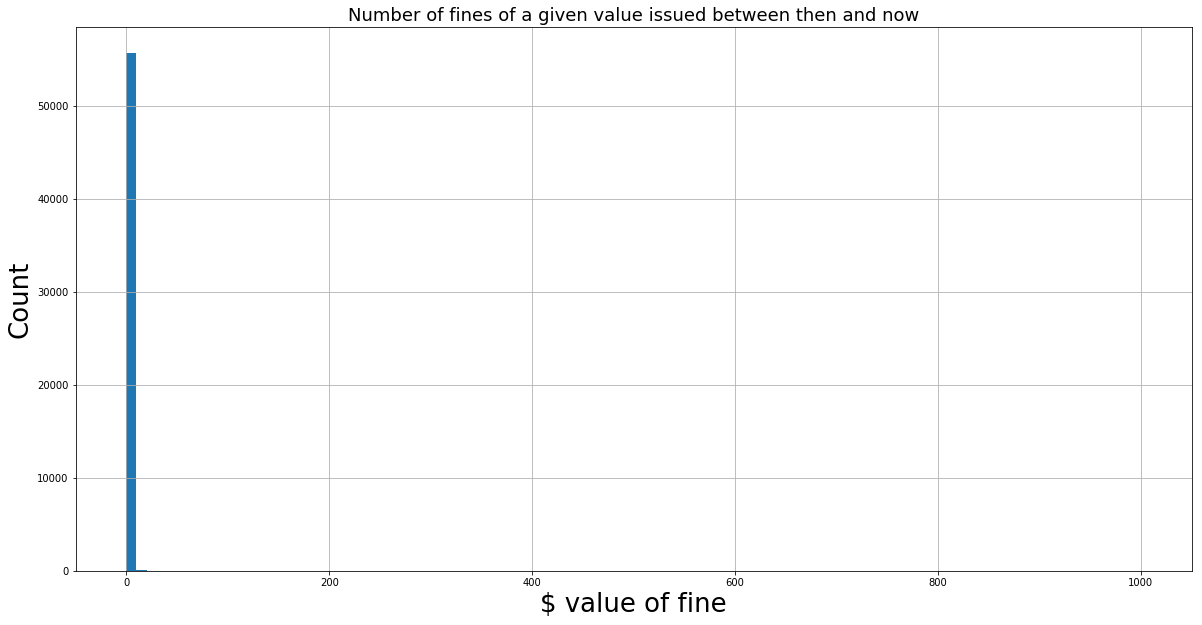

In [9]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(vg_sales["Total_Shipped"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued between {} and {}".format("then", "now"), fontsize=18)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [37]:
steam_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
steam_data.head(2)

,OFFENCE_FINYEAR,OFFENCE_MONTH,OFFENCE_CODE,OFFENCE_DESC,LEGISLATION,SECTION_CLAUSE,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,...,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
0,2011-2012,2011-07-01,74731,Proceed through red traffic light - Camera Det...,ROAD RULES 2008,59(1),353,Y,Red Light / Speed Camera,7163.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,16238
1,2011-2012,2011-07-01,8469,Stop on/near marked foot crossing,ROAD RULES 2008,173(1),265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,78,20670


This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

In [ ]:
income = vg_sales[["Name".head(),"Critic_Score"]].groupby("Name").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

In [ ]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

# _fin_